<p style="text-align:center">
    <a href="https://nbviewer.jupyter.org/github/twMr7/Python-Machine-Learning/blob/master/11-Numpy_Vectorized_Computation.ipynb">
        Open In Jupyter nbviewer
        <img style="float: center;" src="https://nbviewer.jupyter.org/static/img/nav_logo.svg" width="120" />
    </a>
</p>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/twMr7/Python-Machine-Learning/blob/master/11-Numpy_Vectorized_Computation.ipynb)

# 11. Numpy 向量運算

機器學習的資料處理經常使用大量數據作運算，使用 Python 內建的資料類型，沒有辦法利用硬體在向量運算優化的好處。 [Numpy](http://www.numpy.org/) 是 Python 社群中公認的針對科學運算的標準套件，包含了強大的 **`ndarray`** 多維陣列類型，支援硬體優化的向量運算、簡單直覺的向量式操作、線性代數及傅立葉轉換等工具函式。
+ [**11.1 建立向量、矩陣、與陣列**](#create-ndarray)
+ [**11.2 索引及片段 Indexing and Slicing**](#indexing-slicing)
+ [**11.3 陣列形狀的操作**](#shape-manipulation)
+ [**11.4 數值陣列運算**](#numerical-operations)


### § 使用 `numpy` 套件

In [1]:
# 載入 numpy 的慣例方式
import numpy as np

In [2]:
# 部份範例會將資料視覺化，預先開啟 matplotlib 互動呈現
%matplotlib inline
import matplotlib.pyplot as plt

### § 取得說明
除了官方文件 ([https://numpy.org/doc/stable/](https://numpy.org/doc/stable/) ) 以外，互動式介面下也可以取得說明。

In [ ]:
# 取得 np.array 的說明
np.array?

In [ ]:
# 忘記函式的全名怎麼拼，可以打前幾個字，然後按 Tab 鍵。
np.con

<a id="create-ndarray"></a>

## 11.1 建立向量、矩陣、與陣列

Numpy 的 `ndarray` 是可以存放**同類型**資料的多維度陣列，在大多數的應用中，陣列元素的資料類型通常是數值。`ndarray` 類型的物件可以透過 [`array()`、`zeros()`、`ones()`、或 `identity()` 等函式建立](https://docs.scipy.org/doc/numpy/reference/routines.array-creation.html)。 描述 `ndarray` 的基本的屬性有：

+ `ndarray.ndim` - 維度
+ [`ndarray.shape`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html) - Tuple 表示每個維度的大小，也可以指定新的 Tuple 值改變陣列的形狀，類似 `reshape()` 函式，差別是 `shape` 屬性是就地改變。
+ `ndarray.size` - 元素總數量
+ [`ndarray.dtype`](https://docs.scipy.org/doc/numpy/user/basics.types.html) - 元素資料形態，數值通常使用 numpy 提供的 `np.float64`、`np.int32`、`np.int16`、 ...等，可以只寫 `float`、`int` 使用系統預設的浮點數或整數型態。


In [3]:
# a one-dimension vector
v = np.array([0, 1, 2, 3])

print('v: ndim={}, shape={}, size={}, dtype={}'.format(v.ndim, v.shape, v.size, v.dtype))

v: ndim=1, shape=(4,), size=4, dtype=int32


In [4]:
# a 1 x 4 row vector/matrix，明確指定使用整數型態的資料
rowv = np.array([[0, 1, 2, 3]], dtype=int)

print('rowv: ndim={}, shape={}, size={}, dtype={}'.format(rowv.ndim, rowv.shape, rowv.size, rowv.dtype))

rowv: ndim=2, shape=(1, 4), size=4, dtype=int32


In [5]:
# a 4 x 1 column vector/matrix，明確指定使用浮點數型態的資料
colv = np.array([[0],
                 [1],
                 [2],
                 [3]], dtype=float)

print('colv: ndim={}, shape={}, size={}, dtype={}'.format(colv.ndim, colv.shape, colv.size, colv.dtype))

colv: ndim=2, shape=(4, 1), size=4, dtype=float64


In [6]:
# a 3 x 4 matrix，明確指定使用 np.float64 浮點數型態的資料
Amat = np.array([[0, 1,  2,  3],
                 [4, 5,  6,  7],
                 [8, 9, 10, 11]], dtype=np.float64)

print('Amat: ndim={}, shape={}, size={}, dtype={}'.format(Amat.ndim, Amat.shape, Amat.size, Amat.dtype))

Amat: ndim=2, shape=(3, 4), size=12, dtype=float64


In [7]:
# a 2 x 3 x 4 array
A3d = np.array([[[ 0,  1,  2,  3],
                 [ 4,  5,  6,  7],
                 [ 8,  9, 10, 11]],

                [[12, 13, 14, 15],
                 [16, 17, 18, 19],
                 [20, 21, 22, 23]]])

print('A3d: ndim={}, shape={}, size={}, dtype={}'.format(A3d.ndim, A3d.shape, A3d.size, A3d.dtype))

A3d: ndim=3, shape=(2, 3, 4), size=24, dtype=int32


In [8]:
# 元素都為 0 的 3 x 3 matrix
np.zeros((3, 3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [9]:
# 元素都為 1 的 4 x 4 matrix
np.ones((4, 4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [10]:
# 5 x 5 identity matrix
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

其他常用函式，可用來建立具備某種規律排列數列的 ndarray：
+ [`np.arange`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) - 產生一維的固定間距的整數數列陣列。 類似 Python 內建函式 `range()` 的 numpy 陣列版。
+ [`np.linspace`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) - 在指定區間內產生線性（固定）間隔的指定數量的數列。
+ [`np.logspace`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html) - 在指定區間內產生對數間隔的指定數量的數列。
+ [`np.random.rand`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.rand.html) - 產生指定大小的均勻分佈隨機亂數。
+ [`np.random.randn`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html) - 產生指定大小的高斯分佈隨機亂數。
+ [`np.random.randint`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html) - 
產生指定大小的隨機整數。

In [11]:
# [0, 10) 整數數列
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
# 指定範圍及間距，arange([start, ]stop, [step, ])，注意參數 [start, stop) 為半開放區間
np.arange(1, 10, 2)

array([1, 3, 5, 7, 9])

In [13]:
# 時常用來產生數列後就轉成需要的維度形狀
np.arange(1, 25).reshape((2, 3, 4))

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]])

In [14]:
# 指定範圍及點數，linspace(start, stop, num=50)，注意參數 [start, stop] 為封閉區間 
linda = np.linspace(1, 10, num=9)
print(linda)

[ 1.     2.125  3.25   4.375  5.5    6.625  7.75   8.875 10.   ]


In [15]:
# 指定範圍及點數，logspace(start, stop, num=50)，注意參數 [start, stop] 為封閉區間 
logda = np.logspace(0, 1, num=9)
print(logda)

[ 1.          1.33352143  1.77827941  2.37137371  3.16227766  4.21696503
  5.62341325  7.49894209 10.        ]


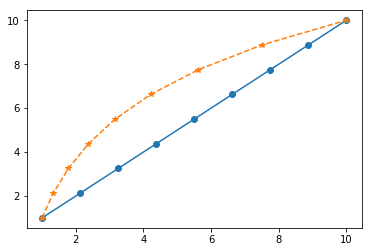

In [16]:
# visualize
y = linda
fig, ax = plt.subplots()
ax.plot(linda, y, 'o-')
ax.plot(logda, y, '*--')

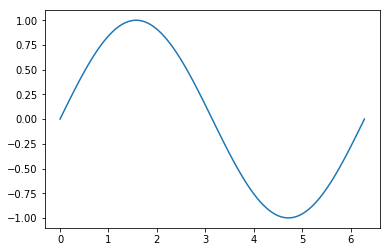

In [17]:
# linspace 適合用來生成數列代入函數求得一系列的函數值
from numpy import pi
x = np.linspace(0, 2*pi, 100)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)

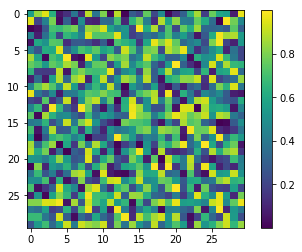

In [18]:
# Uniform 分佈的隨機亂數
image = np.random.rand(30, 30)

# 二維的陣列資料都可以當成影像顯示
plt.imshow(image)
plt.colorbar()

<a id="indexing-slicing"></a>

## 11.2 索引及片段 Indexing and Slicing

### § 基本索引與片段

`ndarray` 基本的索引和片段語法，與使用 Python 序列容器（如：List）的語法雷同，都是使用中括號內置索引序號或冒號間隔的片段範圍：
+ 一維 `vector[index]`，二維 `matrix[index1, index2]`，高維 `array[index1, index2, index3, ...]`。
+ 一維片段 `vector[start:end:step]`，二維片段 `matrix[start:end:step, start:end:step]`，高維片段 array 類推。

片段的索引方式可以放在等號左邊，用來直接對原陣列的片段指派新的值。存取陣列的片段，返回的是原陣列裡的參考 view，不是複製一個新的陣列，如果明確需要另外複製一份相同內容的陣列，可以使用 **copy** 函式，`np.copy()` 或 `ndarray.copy()` 都可以用。

以下索引及片段示意圖來自 *scipy-lectures.org*

![numpy indexing](http://scipy-lectures.org/_images/numpy_indexing.png)

In [19]:
Amat = np.arange(12).reshape((3,4))
print('Amat =\n', Amat, '\n')

Amat =
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 



In [20]:
# 索引維度若小於實際維度時，返回的是子陣列的參考
Amat[0]

array([0, 1, 2, 3])

In [21]:
# 所以個別元素的存取，也可以使用另外一種效率較差的索引方式
print('Amat[0][2] = {}，Amat[0, 2] = {}，兩種索引方式存取同一個位置的元素，\n'
      '但 Amat[0][2] 效率較差，因為 Amat[0] 會先產生一個暫時的陣列物件才存取索引2元素。'
      .format(Amat[0][2], Amat[0, 2]))

Amat[0][2] = 2，Amat[0, 2] = 2，兩種索引方式存取同一個位置的元素，
但 Amat[0][2] 效率較差，因為 Amat[0] 會先產生一個暫時的陣列物件才存取索引2元素。


In [22]:
# 片段可以放在等號左邊，用來直接對原陣列的片段指派新的值
Amat[:, 1::2] = 7
Amat

array([[ 0,  7,  2,  7],
       [ 4,  7,  6,  7],
       [ 8,  7, 10,  7]])

In [23]:
# 明確複製新的物件
AsliceCopy = Amat[:, 1::2].copy()
# 更改元素值
AsliceCopy[:] = 9

# 不會更改到原陣列
print('Amat =\n', Amat, '\n')
print('AsliceCopy =\n', AsliceCopy)

Amat =
 [[ 0  7  2  7]
 [ 4  7  6  7]
 [ 8  7 10  7]] 

AsliceCopy =
 [[9 9]
 [9 9]
 [9 9]]


### § 索引技巧 - 使用布林陣列

陣列索引的中括號裡可以使用另外一個相同形狀及大小的 boolean 陣列（元素都是 `True` 或 `False` 的 `bool` 型態陣列），這種用法的 boolean 陣列又稱為遮罩（**mask**），索引的結果，會返回“複製”索引結果的元素值的一維陣列。 

如果遮罩陣列的維度比被索引的陣列還要少的時候，不足的維度視爲片段全選。 例如： 若 `A` 爲二維陣列，`mask` 是一維的遮罩，則 `A[mask]` 等同於 `A[mask, :]`。 若索引結果無法形成有效的陣列形狀，則視爲錯誤的陳述。

Text(0.5, 1.0, 'Original Image')

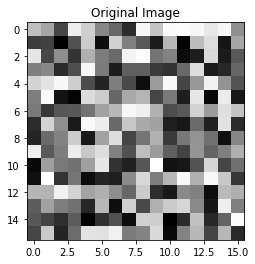

In [26]:
# 產生 [0, 255] 區間的亂數
I = np.random.randint(0, 256, size=(16,16))

# 準備將二維矩陣顯示成影像
fig1, ax1 = plt.subplots()
# 顯示原本的亂數影像
ax1.imshow(I, cmap='gray')
ax1.set_title('Original Image')

Text(0.5, 1.0, 'Mask image')

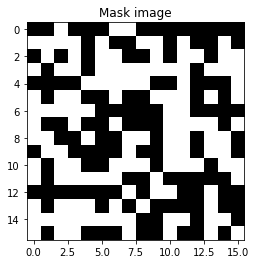

In [27]:
# 取門檻值後作為遮罩，"<" 的比較運算下在一節中詳細介紹
mask = I < 128
# 顯示遮罩成影像
fig2, ax2 = plt.subplots()
ax2.imshow(mask, cmap='gray')
ax2.set_title('Mask image')

Text(0.5, 1.0, 'I[mask] set to 0')

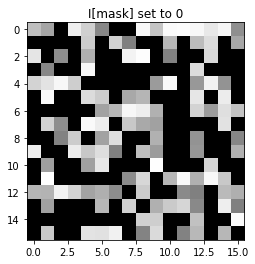

In [28]:
# 遮罩陣列當成索引陣列，將原陣列中符合門檻值條件的元素都設成 0
I[mask] = 0
# 顯示修改後的二維矩陣成影像
fig3, ax3 = plt.subplots()
ax3.imshow(I, cmap='gray')
ax3.set_title('I[mask] set to 0')

In [29]:
# 遮罩索引的結果，會返回索引結果的元素值的一維陣列
I[I > 250]

array([252, 253, 254, 255, 251])

In [30]:
# 5 x 7 陣列
Amat = np.arange(35).reshape(5,7)
print(Amat)

[[ 0  1  2  3  4  5  6]
 [ 7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27]
 [28 29 30 31 32 33 34]]


In [31]:
# 遮罩陣列比被索引陣列的維度還要少時，不足的維度視爲片段全選
mask = np.array([False, True, False, False, True])
Amat[mask]

array([[ 7,  8,  9, 10, 11, 12, 13],
       [28, 29, 30, 31, 32, 33, 34]])

### § 索引技巧 - 使用整數索引陣列

整數索引陣列裡的整數就是索引的序號，正整數或負整數的規則與單一索引值相同。 在索引陣列中，相同的索引序號可以重複出現，其結果就是重複選取相同元素。
+ 對一維的陣列而言，索引陣列會返回一個結果的陣列，其維度與索引陣列相同。 
+ 對高維的陣列而言，若索引陣列的維度比較少，不足的維度視爲片段全選。
+ 片段、遮罩陣列、整數索引陣列可以同時穿插使用。

以下索引技巧及片段示意圖來自 *scipy-lectures.org*

![array of integer indexing](http://scipy-lectures.org/_images/numpy_fancy_indexing.png)

In [32]:
v = np.arange(35)
print('v =', v)

# 一維索引陣列，注意索引陣列是 Python List
v[[7, 7, 21, 23, -7, -5]]

v = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34]


array([ 7,  7, 21, 23, 28, 30])

In [33]:
# 返回索引結果與索引陣列維度及形狀相同
print(v[np.array([[7, 7], [21, 23], [-7, -5]])])

[[ 7  7]
 [21 23]
 [28 30]]


In [34]:
# 可以直接指派新值給這樣的索引位置
v[np.array([[7, 7], [21, 23], [-7, -5]])] = 99
print(v)

[ 0  1  2  3  4  5  6 99  8  9 10 11 12 13 14 15 16 17 18 19 20 99 22 99
 24 25 26 27 99 29 99 31 32 33 34]


In [35]:
# 索引陣列的維度比較少，不足的維度視爲片段全選
v.shape = (5, 7)
print(v)

v[np.array([1, 3, 4])]

[[ 0  1  2  3  4  5  6]
 [99  8  9 10 11 12 13]
 [14 15 16 17 18 19 20]
 [99 22 99 24 25 26 27]
 [99 29 99 31 32 33 34]]


array([[99,  8,  9, 10, 11, 12, 13],
       [99, 22, 99, 24, 25, 26, 27],
       [99, 29, 99, 31, 32, 33, 34]])

<a id="shape-manipulation"></a>

## 11.3 陣列形狀的操作

陣列因不同運算的需求，經常會需要操作[形狀的改變](https://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html)，如：轉置、增減維度、一維平坦化、堆疊串接、分拆重組等。

### § 一維平坦化 Flatten

In [36]:
Amat = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print('Amat =\n', Amat)

# 一維 row-major 平坦化，返回原陣列的 view（同物件參考）
print('Amat reshape =', Amat.reshape(-1))

# 一維 row-major 平坦化，返回原陣列的 copy
print('Amat flatten =', Amat.flatten())

Amat =
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Amat reshape = [1 2 3 4 5 6 7 8 9]
Amat flatten = [1 2 3 4 5 6 7 8 9]


### § 轉置 Transpose

In [37]:
# transpose
print('Amat.T =\n', Amat.T)
print('numpy.transpose(Amat) =\n', np.transpose(Amat))

Amat.T =
 [[1 4 7]
 [2 5 8]
 [3 6 9]]
numpy.transpose(Amat) =
 [[1 4 7]
 [2 5 8]
 [3 6 9]]


### § 增減維度

In [38]:
Aflat = Amat.reshape(-1)
print('Aflat shape{} = {}'.format(Aflat.shape, Aflat))

Aflat shape(9,) = [1 2 3 4 5 6 7 8 9]


In [39]:
# 擴增維度，以下操作與 Aflat[np.newaxis, :] 相同
#Aexp0 = np.expand_dims(Aflat, axis=0)
Aexp0 = Aflat[np.newaxis, :]
print('Aexp0 shape{} = {}'.format(Aexp0.shape, Aexp0))

Aexp0 shape(1, 9) = [[1 2 3 4 5 6 7 8 9]]


In [40]:
# 擴增維度，以下操作與 Aflat[:, np.newaxis] 相同
Aexp1 = np.expand_dims(Aflat, axis=1)
print('Aexp1 shape{} = {}'.format(Aexp1.shape, Aexp1))

Aexp1 shape(9, 1) = [[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


In [41]:
# 移除陣列的單一維度
Asqueeze = np.squeeze(Aexp0)
print('Aexp0 squeeze to {} = {}'.format(Asqueeze.shape, Asqueeze))

Aexp0 squeeze to (9,) = [1 2 3 4 5 6 7 8 9]


### § 堆疊、串接、重組

許多 numpy 操作或運算陣列的方法都有一個 `axis` 參數，例如以下範例中示範的 [`concatenate`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html)。 這個 `axis` 參數通常是用來指定該方法要套用的方向：

+ 第一個維度（`axis=0`）是列（**row**）方向或稱垂直（**vertical**）方向
+ 第二個維度（`axis=1`）的行（**column**）方向或稱水平（**horizontal**）方向
+ 其他更高維度的方向（axis = 2, 3, 4, ...)

有的方法還可以使用 `axis=None` 的設定，這個無軸向的操作則視不同方法有不同的意義。

| row0 | col1 | col2 | col3 | col4 | ...  | colN  |
|------|----- |----- |----- |----- |----- |-----  |
| row1 |  
| row2 |
| row3 |
| row4 |
| ...  |
| rowN |


In [42]:
# 建立一黑一白的 3 x 3 陣列
B, W = np.zeros((3,3)), np.ones((3,3))
print(B, '\n'); print(W, '\n')

# 沿水平方向串接
BnW = np.concatenate((B, W), axis=1)
print(BnW)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

[[0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]]


In [43]:
# 翻轉，用 axis 參數指定翻轉方向
WnB = np.flip(BnW, axis=1)
print(WnB, '\n')

[[1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]] 



In [44]:
# 沿垂直方向串接
BnW_WnB = np.concatenate((BnW, WnB), axis=0)
print(BnW_WnB)

[[0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]]


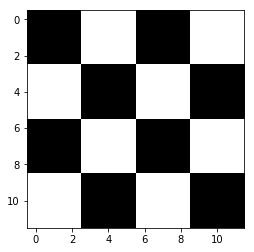

In [45]:
# 重複區塊如貼瓷磚
ChessBoard = np.tile(BnW_WnB, (2,2))
fig, ax = plt.subplots()
ax.imshow(ChessBoard, cmap='gray')

<a id="numerical-operations"></a>

## 11.4 數值陣列運算

### § Element-wise 算數及比較運算

`ndarray` 常用的算數及比較運算操作是定義為對每個元素的逐項（element-wise）操作，然後返回運算結果的 `ndarray` 物件。

+ **比較運算子** - 運算結果返回 `bool` 陣列。

| 比較運算操作           | 說明          |
|------------------------|---------------|
| **X < Y**              | 小於          |
| **X <= Y**             | 小於或等於    |
| **X > Y**              | 大於          |
| **X >= Y**             | 大於或等於    |
| **X == Y**             | 等於          |
| **X != Y**             | 不等於        |
| **logical_and(X, Y)**  | 真值邏輯 AND  |
| **logical_or(X, Y)**   | 真值邏輯 OR   |
| **logical_xor(X, Y)**  | 真值邏輯 XOR  |
| **logical_not(X)**     | 真值邏輯 NOT  |

Note： 要比較兩個陣列（array-wise）是否形狀大小及元素全部相同，可以使用 `array_equal(X, Y)` 函式。

+ **算數運算子** - 運算結果返回數值陣列。

| 算數運算操作          | 說明               | in-place 操作   |
|-----------------------|--------------------|-----------------|
| **X + Y, X - Y**      | 加法，減法         | **+=, -=**      |
| **X \* Y, X / Y**     | 乘法，除法         | **\*=, /=**     |
| **X // Y, X % Y**     | 取商，取餘數       | **//=, %=**     |
| **X\*\*Y**            | 指數次方           | **\*\*=**       |
| **X &#124; Y, X & Y** | 位元 OR，AND       | **&#124;=, &=** |
| **X << Y, X >> Y**    | 位元左位移，右位移 | **<<=, >>=**    |
| **X ^ Y**             | 位元 XOR           | **^=**          |

+ **一元算數運算子** - 運算結果返回數值陣列。

| 算數運算操作  | 說明         |
|---------------|--------------|
| **-X**        | 取負數       |
| **~X**        | 位元反相     |

In [46]:
# 元素逐項（element-wise）比較
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
print('a == b =>', a == b)
print('a > b =>', a > b)

a == b => [False  True False  True]
a > b => [False False  True False]


In [47]:
# 陣列整體（array-wise）比較
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
c = np.array([1, 2, 3, 4])
print('a, b 陣列是否完全相等：', np.array_equal(a, b))
print('a, c 陣列是否完全相等：', np.array_equal(a, c))

a, b 陣列是否完全相等： False
a, c 陣列是否完全相等： True


In [48]:
# 陣列真值邏輯比較
a = np.array([1, 1, 0, 0], dtype=bool)
b = np.array([1, 0, 1, 0], dtype=bool)
print('真值邏輯比較 a OR b：', np.logical_or(a, b))
print('真值邏輯比較 a AND b：', np.logical_and(a, b))

真值邏輯比較 a OR b： [ True  True  True False]
真值邏輯比較 a AND b： [ True False False False]


In [49]:
# 陣列元素逐項（element-wise）運算
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
c = np.array([1, 2, 3, 4])
print('a + b =', a + b)
print('b * c =', b * c)
print('a + b * c =', a + b * c)
print('(a + b) / c =', (a + b) / c)

a + b = [5 4 5 8]
b * c = [ 4  4  6 16]
a + b * c = [ 5  6  9 20]
(a + b) / c = [5.         2.         1.66666667 2.        ]


### § 散播 Broadcasting

上述二元運算的一般形式中，除了兩個陣列運算元（**X, Y**）的形狀大小都一致以外，numpy 也容許在符合散播（**broadcasting**）條件下運算元形狀大小不一樣。 基本的散播相容的規則是：
1. 兩個陣列維度大小相等，或
2. 其中有一個維度大小是 1。

以下散播機制的示意圖來自 *scipy-lectures.org*
![numpy broadcasting 1](http://scipy-lectures.org/_images/numpy_broadcasting.png)

看似複雜的散播機制，其實都是為了簡化計算及程式碼的算式，讓程式碼更直覺、更自然、有更高的可讀性。以下範例及示意圖來自 [numpy 官方手冊](https://docs.scipy.org/doc/numpy/user/theory.broadcasting.html)：
```
>>> a = array([1.0, 2.0, 3.0])
>>> b = 2.0
>>> a * b
array([ 2.,  4.,  6.])
```
![numpy broadcasting 2](https://numpy.org/doc/stable/_images/theory.broadcast_1.gif)

In [50]:
Amat = np.arange(12).reshape(3, 4)
print(Amat)

# 之前看過的片段指派新值，其實暗中運用了 broadcasting
Amat[2] = 0
print(Amat)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[0 1 2 3]
 [4 5 6 7]
 [0 0 0 0]]


[[0.         1.         2.         3.         4.         5.        ]
 [1.         1.41421356 2.23606798 3.16227766 4.12310563 5.09901951]
 [2.         2.23606798 2.82842712 3.60555128 4.47213595 5.38516481]
 [3.         3.16227766 3.60555128 4.24264069 5.         5.83095189]
 [4.         4.12310563 4.47213595 5.         5.65685425 6.40312424]
 [5.         5.09901951 5.38516481 5.83095189 6.40312424 7.07106781]]


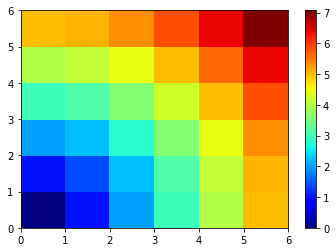

In [51]:
# 計算距離
x, y = np.arange(6).reshape((6,1)), np.arange(6).reshape((1,6))
distance = np.sqrt(x ** 2 + y ** 2)
print(distance)
plt.pcolor(distance, cmap='jet')
plt.colorbar()

In [52]:
# 前一個計算距離的範例，使用 np.ogrid 可達到相同目的
x, y = np.ogrid[0:6, 0:6]
print(np.sqrt(x ** 2 + y ** 2))
x, y

[[0.         1.         2.         3.         4.         5.        ]
 [1.         1.41421356 2.23606798 3.16227766 4.12310563 5.09901951]
 [2.         2.23606798 2.82842712 3.60555128 4.47213595 5.38516481]
 [3.         3.16227766 3.60555128 4.24264069 5.         5.83095189]
 [4.         4.12310563 4.47213595 5.         5.65685425 6.40312424]
 [5.         5.09901951 5.38516481 5.83095189 6.40312424 7.07106781]]


(array([[0],
        [1],
        [2],
        [3],
        [4],
        [5]]), array([[0, 1, 2, 3, 4, 5]]))

In [53]:
# 不想要 broadcasting 的話，使用 np.mgrid 可達到相同目的
x, y = np.mgrid[0:6, 0:6]
print(np.sqrt(x ** 2 + y ** 2))
x, y

[[0.         1.         2.         3.         4.         5.        ]
 [1.         1.41421356 2.23606798 3.16227766 4.12310563 5.09901951]
 [2.         2.23606798 2.82842712 3.60555128 4.47213595 5.38516481]
 [3.         3.16227766 3.60555128 4.24264069 5.         5.83095189]
 [4.         4.12310563 4.47213595 5.         5.65685425 6.40312424]
 [5.         5.09901951 5.38516481 5.83095189 6.40312424 7.07106781]]


(array([[0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5, 5]]), array([[0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5]]))

### § 有無向量運算優化的差異

對 `list` 裡的所有數值操作相同運算，免不了要使用迴圈。 使用 `numpy.ndarray` 運算，不僅程式碼的算式精簡、可讀性較高，還可以運用處理器的向量運算引擎，獲得更快的運算能力。

In [54]:
# 使用迴圈計算 10000 個整數加法
L = list(range(10000))
%timeit [x+1 for x in L]

509 µs ± 5.46 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [55]:
# 使用 numpy 陣列的向量運算 10000 個整數加法
A = np.arange(10000, dtype=int)
%timeit A + 1

6.17 µs ± 125 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [56]:
# 使用迴圈計算 10000 個浮點數指數運算
import random
L = [random.random() for x in range(10000)]
%timeit [x**2.0 for x in L]

1.46 ms ± 15.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [57]:
# 使用 numpy 陣列的向量運算 10000 個浮點數指數運算
A = np.random.rand(10000)
%timeit A ** 2.0

4.58 µs ± 16.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### § 數學、統計、線性代數

Numpy 提供了可利用陣列處理向量運算的 [數學函式](https://docs.scipy.org/doc/numpy/reference/routines.math.html)，包含了多種和積及差分、三角函數、雙曲線函數、指數與對數、複數等函數。 也有常用的基本 [統計函式](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html) 如平均、變異、標準差、中位數、相關係數、共變異數等。 [線性代數](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html) 的矩陣運算在 `numpy.linalg` 模組中，提供了包含矩陣及向量乘積、矩陣分解、特徵值與特徵向量、矩陣線性方程式求解等函式。 還有更多進階工程及科學運算的函式另外在 [scipy](https://docs.scipy.org/doc/scipy/reference/) 套件中。

這些函式比較適合用完整的應用範例來展示。

y = [-1.   0.2  0.9  2.1]
A =
 [[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]]

solution: m = 0.9999999999999997, c = -0.949999999999999


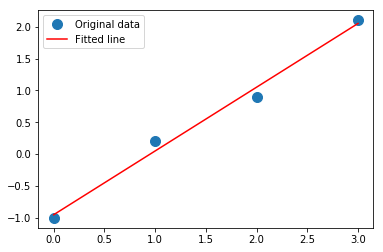

In [58]:
# least-squares solution to a linear matrix equation
# 已知點座標 (x1,y1), (x2,y2), (x3,y3), (x4,y4), ...
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])
print('y =', y)

# 匹配直線方程式 y = mx + c （線性回歸）
# 將方程式重新改寫成陣列形式 y = Ap, where A = [x 1], p = [m c]'
A = np.vstack([x, np.ones(len(x))]).T
print('A =\n', A)

# 最小平方法解線性方程式最佳解
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print('\nsolution: m = {}, c = {}'.format(m, c))

fig, ax = plt.subplots()
ax.plot(x, y, 'o', label='Original data', markersize=10)
ax.plot(x, m*x + c, 'r', label='Fitted line')
ax.legend()

### 作業練習

改寫上面的最小平方法範例，使用 arange() + random 雜訊產生 x, y 的測試資料，再執行求解方程式看看。